In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
    
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# base_file_loc = '/group/belle/users/jaeyoung/storage/01_recon/pre_skim_1ab_inv/'
# base_file_loc = '/group/belle/users/jaeyoung/storage/01_recon/pre_extract_skim_1ab_inv/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/skim_gE_700MEV_1abinv_pre_extraction/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_pre_extract/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract_400fb/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_g1_clustertheta_sig_extract_400fb/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_CL_point1_sig_extract_400fb_onlybkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_0009_Q_onlybkg_pre_extract/'
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_0009_Q_sig_extract_sig_bkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_zernike/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv4_sig_ext_onlybkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v2_pre_omega_const_bkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/train_v6_beambkg_sig_ext/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v8_pre_extraction_bkg/'

base_file_loc =  '/media/jykim/T7/storage/01_recon/v8_pre_extraction_trained/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v8_pre_extraction_trained_v3/'
#
base_file_loc = '/media/jykim/T7/storage/01_recon/v8_pre_bkg_1ab/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v9mask_new_pre_selection_400_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v9mask_sig_ext_sigbkg_1ab/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/v12_sig_ext_sigbkg_1ab/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/v14_sig_ext_bkg_1ab/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/v15_sig_ext_bkg_1ab/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/v15_sig_ext_sigbkg_1ab/'
# base_file_loc = '/media/jykim/T7/storage_b2/storage/v16_pre_bkg_1ab/'

#base_file_loc = '/media/jykim/T7/storage/01_recon/v10_pre_extraction_400_bkgsig/'
#base_file_loc = '/media/jykim/T7/storage/01_recon/v9mask_pre_extraction_400_bkgsig/'

base_file_loc = '/media/jykim/T7/storage_b2/storage/v16_pre_bkg_1ab/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v26_onlybkg_pre/'
base_file_loc = '/media/jykim/T7/storage/01_recon/Vpi0veto_v26_onlybkg_sig_ext_400/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_400/'

phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_rho/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'


In [41]:
base_filter=' D0_M>1.67 && D0_M<2.06'
# base_filter=' D0_M>1.8 && D0_M<1.9 '


# base_filter=' Pis_charge==1 && D0_M>1.8 && D0_M<1.9 '

# base_filter='rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '
# ccbar_filter = base_filter + '&& iCascDcyBrP_Dst_0 !=217'

#base_filter='Pi0_Prob<0.90  && D0_M>1.67 && D0_M<2.06 '

# base_filter='Pi0_Prob<0.95 && phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '


#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0','Rho_M','Dstarp_Q','Dstarp_CMS_p','Rho_CMS_p','Rho_pt','Rho_p','gamma_p','gamma_genMotherPDG']
# variables += ['Dstarp_missingMomentumOfEvent','Dstarp_missingMomentumOfEvent_theta','Dstarp_missingMomentumOfEventCMS','Dstarp_missingMomentumOfEventCMS_theta','Dstarp_missingEnergyOfEventCMS','Dstarp_missingMass2OfEvent','Dstarp_visibleEnergyOfEventCMS']
# variables+=['Pi0_Prob','Eta_Prob']
variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
            'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
            'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
            'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
            'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
            'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
            'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','gamma_genMotherPDG']
# variables += ['rho_MVA2']

ccbar_variables = variables + ['iCascDcyBrP_Dst_0']
tree='rho'

In [7]:
# pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=ccbar_filter,variables=ccbar_variables)
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)



# pd_phigamma_ccbar_remain = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_phigamma_ccbar_signal = get_pd(file=phigamma_ccbar, tree=tree,base_filter=signal_filter,variables=variables)

pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

D0_M


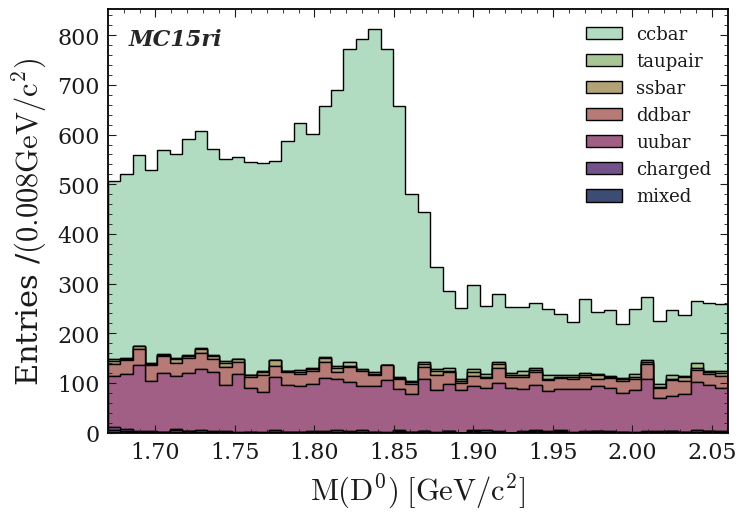

<Figure size 800x550 with 0 Axes>

In [8]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    ccbar_bkg = {var : pd_phigamma_ccbar[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

Dstarp_Q


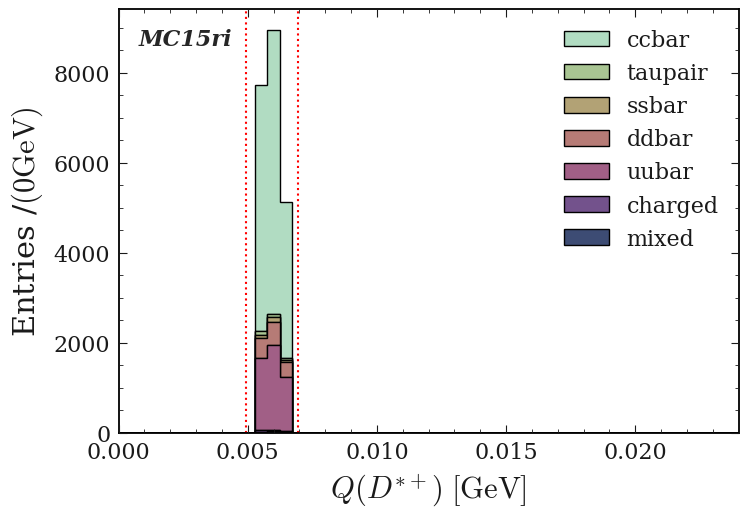

<Figure size 800x550 with 0 Axes>

In [9]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["Dstarp_Q"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    ccbar_bkg = {var : pd_phigamma_ccbar[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,0.024)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    plt.axvline(x=0.00593-0.001,  color='red', linestyle='dotted')
    plt.axvline(x=0.00593+0.001,  color='red', linestyle='dotted')

    ax = plt.gca()
    ax.annotate('', xy=(0.00593-0.001,10000), xytext=(0.00593+0.001,10000), arrowprops=dict(arrowstyle="<->",color="red"),)
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$Q(D^{*+}) \; [\mathrm{GeV}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV})$');
    plt.show()
    plt.clf()

In [10]:
# plt.hist(pd_phigamma_sigMC['Dstarp_Q'], bins=xbins, histtype='step');
# plt.axvline(x=0.00593-0.0010,  color='red', linestyle='dotted')
# plt.axvline(x=0.00593+0.0010,  color='red', linestyle='dotted')

# print(len(pd_phigamma_sigMC))

In [11]:
# phig_pre_extraction_cut = 'abs(Rho_M - 0.77526)< 0.150 & abs(Dstarp_Q-0.00593)<0.0010'
# phig_pre_extraction_cut = 'abs(Rho_M - 0.77526)< 0.125 & abs(Dstarp_Q-0.00593)<0.0006'
phig_pre_extraction_cut = 'abs(Rho_M - 0.77526)< 0.125 & abs(Dstarp_Q-0.00593)<0.002'
phig_pre_extraction_cut = 'abs(Rho_M - 0.77526)< 0.125 & abs(Dstarp_Q-0.00593)<0.001'
phig_pre_extraction_cut = 'abs(Rho_M - 0.77526)< 0.125 & abs(Dstarp_Q-0.00593)<0.0006'
# phig_pre_extraction_cut = 'abs(Rho_M - 0.77526)< 0.125 & ((Dstarp_Q-0.00593>0.002 & Dstarp_Q-0.00593<0.004) | (Dstarp_Q-0.00593<-0.002 & Dstarp_Q-0.00593>-0.004))'

phig_pre_extraction_ccbar = pd_phigamma_ccbar.query(phig_pre_extraction_cut)
phig_pre_extraction_uubar = pd_phigamma_uubar.query(phig_pre_extraction_cut)
phig_pre_extraction_ddbar = pd_phigamma_ddbar.query(phig_pre_extraction_cut)
phig_pre_extraction_ssbar = pd_phigamma_ssbar.query(phig_pre_extraction_cut)
phig_pre_extraction_charged = pd_phigamma_charged.query(phig_pre_extraction_cut)
phig_pre_extraction_mixed = pd_phigamma_mixed.query(phig_pre_extraction_cut)
phig_pre_extraction_taupair = pd_phigamma_taupair.query(phig_pre_extraction_cut)


D0_M


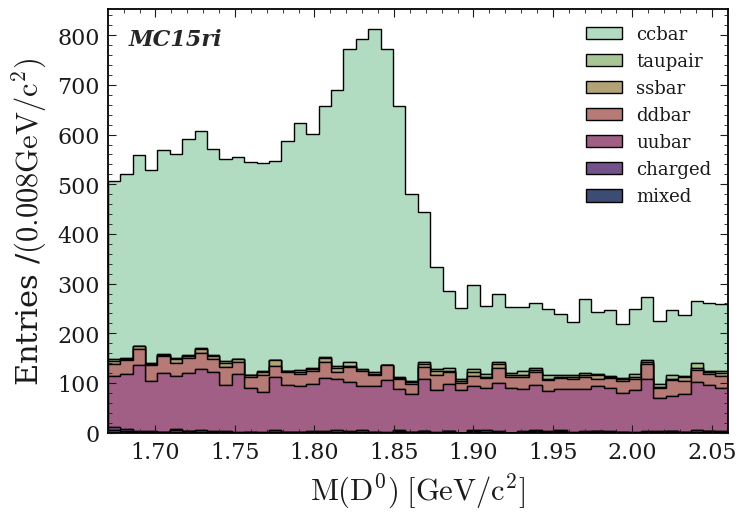

<Figure size 800x550 with 0 Axes>

In [12]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_pre_extraction_mixed[var] }
    charged_bkg = {var : phig_pre_extraction_charged[var] }
    ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
    uubar_bkg = {var : phig_pre_extraction_uubar[var] }
    ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
    taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()


Dstarp_CMS_p


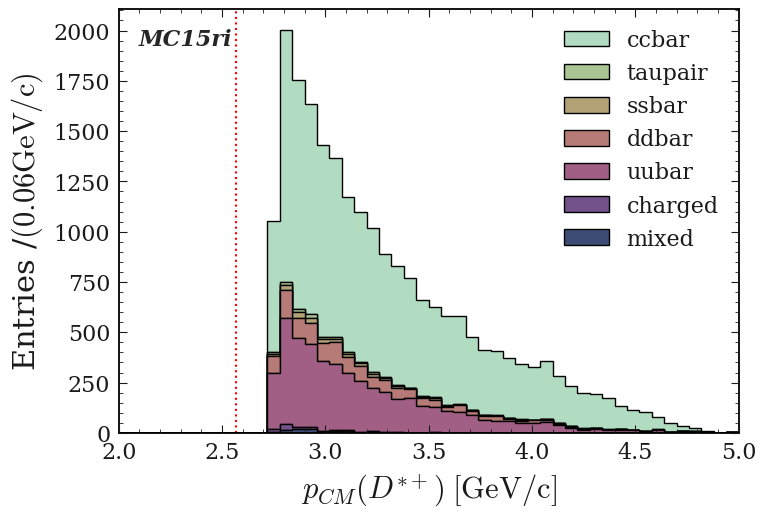

<Figure size 800x550 with 0 Axes>

In [13]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["Dstarp_CMS_p"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_pre_extraction_mixed[var] }
    charged_bkg = {var : phig_pre_extraction_charged[var] }
    ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
    uubar_bkg = {var : phig_pre_extraction_uubar[var] }
    ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
    taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(2,5)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.axvline(x=2.57,  color='red', linestyle='dotted')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$p_{CM}(D^{*+})\; [\mathrm{GeV/c}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c})$');
    plt.show()
    plt.clf()


Pi0_Prob


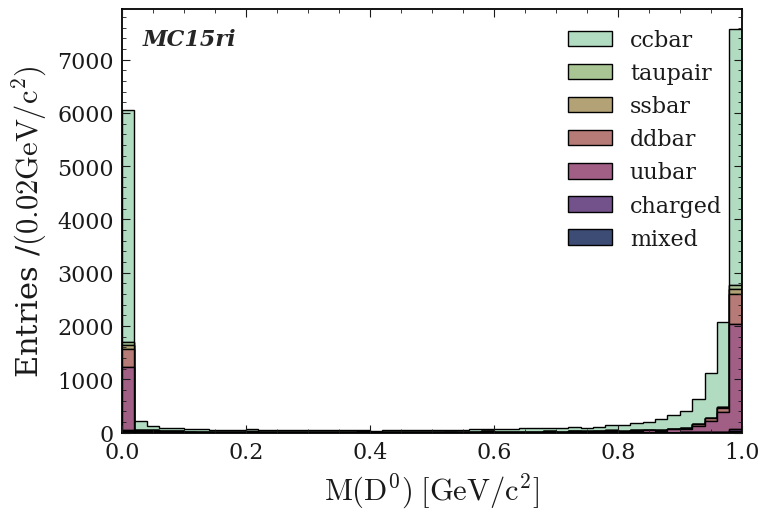

<Figure size 800x550 with 0 Axes>

In [11]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["Pi0_Prob"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_pre_extraction_mixed[var] }
    charged_bkg = {var : phig_pre_extraction_charged[var] }
    ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
    uubar_bkg = {var : phig_pre_extraction_uubar[var] }
    ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
    taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()


In [14]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["Eta_Prob"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_pre_extraction_mixed[var] }
    charged_bkg = {var : phig_pre_extraction_charged[var] }
    ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
    uubar_bkg = {var : phig_pre_extraction_uubar[var] }
    ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
    taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()


Eta_Prob


KeyError: 'Eta_Prob'

FBDT_rho


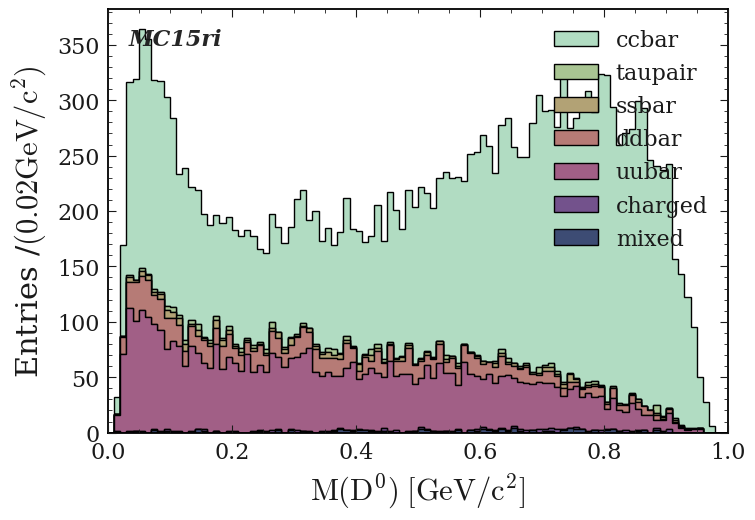

<Figure size 800x550 with 0 Axes>

In [13]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["FBDT_rho"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_pre_extraction_mixed[var] }
    charged_bkg = {var : phig_pre_extraction_charged[var] }
    ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
    uubar_bkg = {var : phig_pre_extraction_uubar[var] }
    ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
    taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,101)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()


rho_MVA2


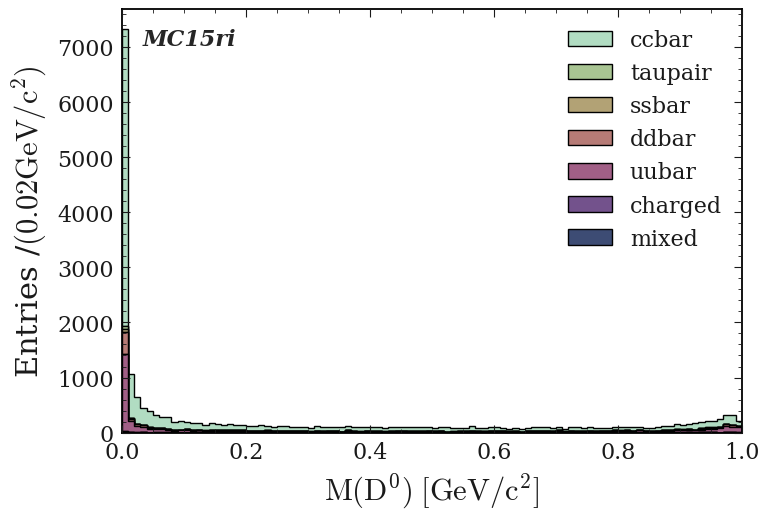

<Figure size 800x550 with 0 Axes>

In [14]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["rho_MVA2"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_pre_extraction_mixed[var] }
    charged_bkg = {var : phig_pre_extraction_charged[var] }
    ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
    uubar_bkg = {var : phig_pre_extraction_uubar[var] }
    ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
    taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,101)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()


roe_pi0_InvM_75MeV


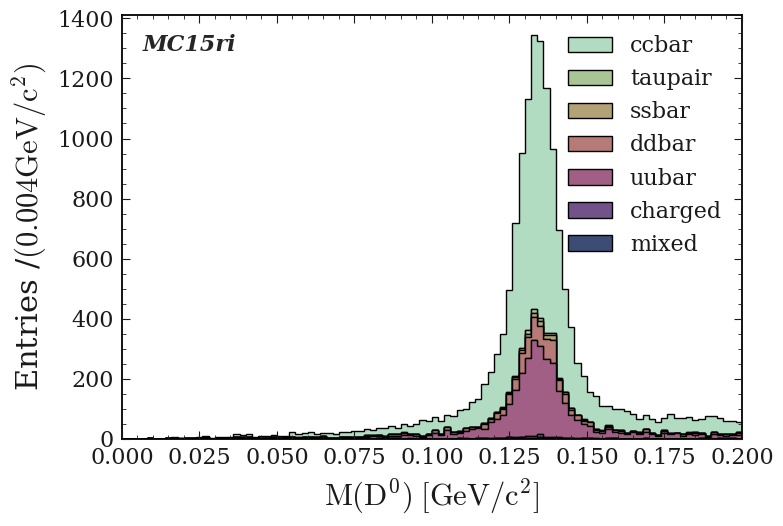

<Figure size 800x550 with 0 Axes>

In [15]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["roe_pi0_InvM_75MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_pre_extraction_mixed[var] }
    charged_bkg = {var : phig_pre_extraction_charged[var] }
    ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
    uubar_bkg = {var : phig_pre_extraction_uubar[var] }
    ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
    taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,0.2)
    xbins = np.linspace(*xrange,101)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()


In [110]:
def calculate_FOM( bkg_pd, sig_pd, cut_list, scale_factor):
    
    FOM_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = 'Dstarp_CMS_p > ' + str(cut_value) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))

        FOM_list.append(FOM)    
    
    return FOM_list

In [111]:
def calculate_eff( bkg_pd, sig_pd, cut_list):
    
    eff_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = 'Dstarp_CMS_p > ' + str(cut_value) 
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)

        eff = nsig/(0.5*1e+6*0.998951)
        eff_list.append(eff)    
    
    return eff_list

In [112]:
def calculate_purity( bkg_pd, sig_pd, cut_list):
    
    purity_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = 'Dstarp_CMS_p > ' + str(cut_value) 
        #temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        
        nREALsig = len(temp_sig_pd.query("Dstarp_isSignal==1"))
        
        #nbkg = len(temp_bkg_pd)

        purity = nREALsig/nsig
        purity_list.append(purity)    
    
    return purity_list

In [113]:
FOM_cut_list = np.linspace(2,3.5,151)

In [114]:
phig_bkg_pre_ext_all = pd.concat([phig_pre_extraction_ccbar,
                                phig_pre_extraction_uubar,
                                phig_pre_extraction_ddbar,
                                phig_pre_extraction_ssbar,
                                phig_pre_extraction_charged,
                                phig_pre_extraction_mixed,
                                phig_pre_extraction_taupair], ignore_index=True)

In [115]:
#sigMC_file_loc = '/media/jykim/T7/storage/01_recon/rho/gE_700MEV_signalMC_recon_mdst_rho.root'
# sigMC_file_loc = '/media/jykim/T7/storage/01_recon/rho/trainv2new_pre_extraction_signalMC_recon_mdst_rho.root'
# sigMC_file_loc = '/media/jykim/T7/storage/01_recon/rho/trainv2new_0009_Q_pre_extract_signalMC_recon_mdst_rho.root'
# sigMC_file_loc = '/media/jykim/T7/storage/01_recon/rho/v2_pre_omega_const_signalMC_recon_mdst_rho.root'
base_file_loc = '/media/jykim/T7/storage/01_recon/v26_sigbkg_pre_ext/'

sigMC_file_loc = base_file_loc + 'topo/resultfile/result_rho/standard.root'
# base_filter='rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Dstarp_isSignal==1 && abs(Rho_M - 0.77526)< 0.125 && abs(Dstarp_Q-0.00593)<0.002 '
# base_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06  && abs(Rho_M - 0.77526)< 0.125 && abs(Dstarp_Q-0.00593)<0.001 '

base_filter=' D0_M>1.8 && D0_M<1.9  && abs(Rho_M - 0.77526)< 0.125 && abs(Dstarp_Q-0.00593)<0.0006 '

# base_filter += '&& iCascDcyBrP_Dst_0 ==133'
# base_filter += '&& iDcyBrIncDcyBr_D0Vg_0 == 1'
base_filter += '&& nSigCascDcyBr_2==1'


variables=['D0_M','D0_cosHel_0','Rho_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal']
tree='rho'

pd_phigamma_sigMC = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)

In [116]:
half_1_sigMC = '/media/jykim/T7/storage/01_recon/rho/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_rho.root'
base_filter=' D0_M>1.8 && D0_M<1.9  && abs(Rho_M - 0.77526)< 0.125 && abs(Dstarp_Q-0.00593)<0.0006 '
variables=['D0_M','D0_cosHel_0','Rho_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal']
tree='rho'
pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)

scale_factor = len(pd_phigamma_sigMC)/len(pd_half_1_sigMC )

In [117]:
print(len(pd_phigamma_sigMC))

162


In [118]:
scale_factor

0.0019804885205017236

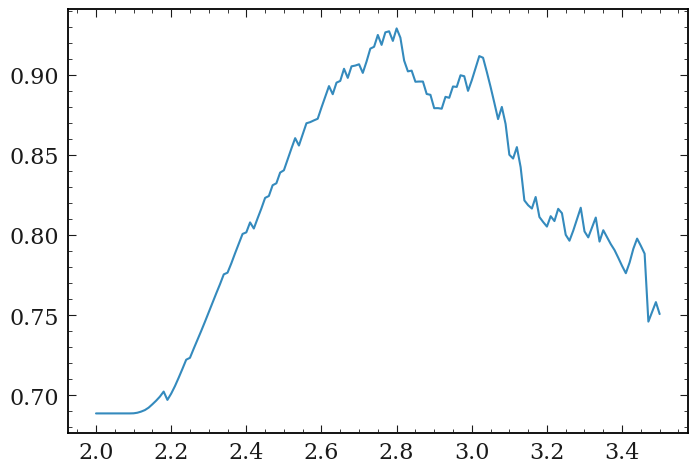

In [119]:
FOM_phig_list = calculate_FOM(phig_bkg_pre_ext_all,pd_phigamma_sigMC, FOM_cut_list,1)
plt.plot(FOM_cut_list,FOM_phig_list);

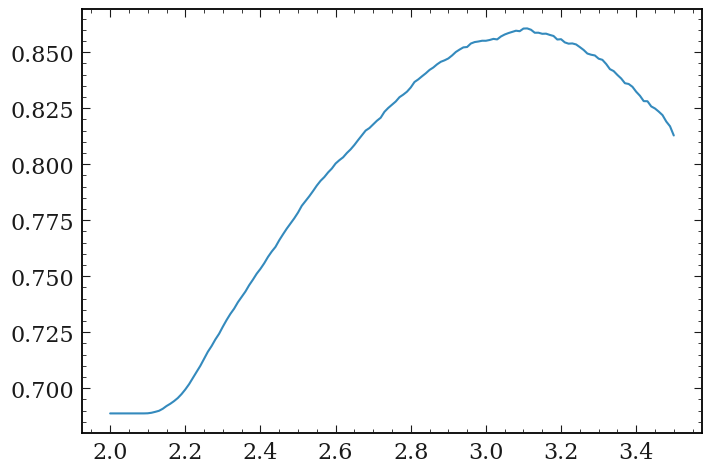

In [120]:
FOM_phig_list = calculate_FOM(phig_bkg_pre_ext_all,pd_half_1_sigMC, FOM_cut_list,scale_factor)
plt.plot(FOM_cut_list,FOM_phig_list);

In [121]:
# sigMC_file_loc = '/group/belle/users/jaeyoung/storage/01_recon/rho/trainv2_pre_signalMC_recon_mdst_rho.root'
# sigMC_file_loc = '/media/jykim/T7/storage/01_recon/rho/gE_700MEV_signalMC_recon_mdst_rho.root'
sigMC_file_loc = '/media/jykim/T7/storage/01_recon/rho/trainv2new_pre_extraction_signalMC_recon_mdst_rho.root'
sigMC_file_loc = '/media/jykim/T7/storage/01_recon/rho/trainv2new_0009_Q_pre_extract_signalMC_recon_mdst_rho.root'
sigMC_file_loc = '/media/jykim/T7/storage/01_recon/rho/v2_pre_omega_const_signalMC_recon_mdst_rho.root'
sigMC_file_loc = '/media/jykim/T7/storage/01_recon/rho/v9mask_pre_extraction_signalMC_recon_mdst_rho.root'
sigMC_file_loc = '/media/jykim/T7/storage/01_recon/rho/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_rho.root'

base_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06  && abs(Rho_M - 0.77526)< 0.125 && abs(Dstarp_Q-0.00593)<0.0010'
base_filter=' D0_M>1.8 && D0_M<1.9  && abs(Rho_M - 0.77526)< 0.125 && abs(Dstarp_Q-0.00593)<0.0006'

#base_filter='rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06  && abs(Rho_M - 0.77526)< 0.125 && abs(Dstarp_Q-0.00593)<0.002 '

variables=['D0_M','D0_cosHel_0','Rho_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal']
tree='rho'

xrange=(0,0.01)
xbins = np.linspace(*xrange,51)
pd_phigamma_isSignal_all_sigMC = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)

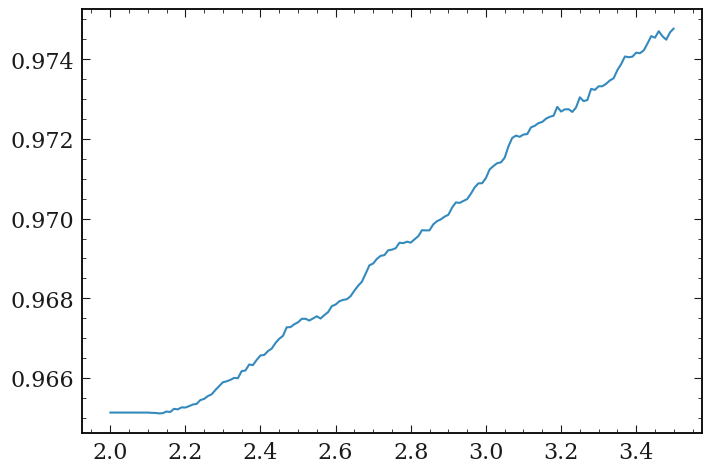

In [122]:
purity_phig_list = calculate_purity(phig_bkg_pre_ext_all, pd_phigamma_isSignal_all_sigMC, FOM_cut_list)
plt.plot(FOM_cut_list,purity_phig_list);

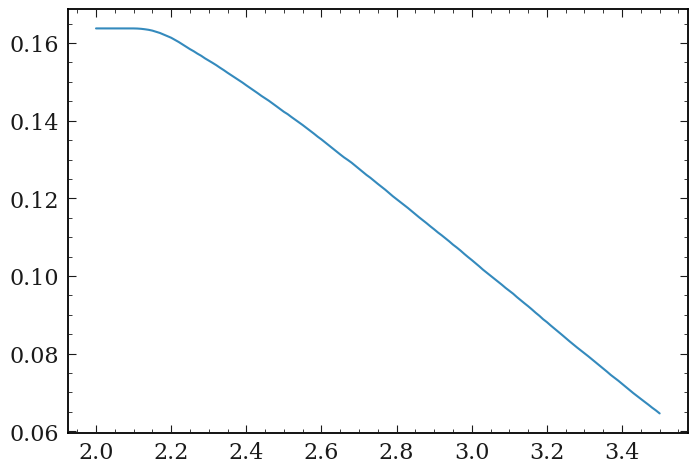

In [123]:
eff_phig_list = calculate_eff(phig_bkg_pre_ext_all, pd_phigamma_isSignal_all_sigMC, FOM_cut_list)
plt.plot(FOM_cut_list,eff_phig_list);

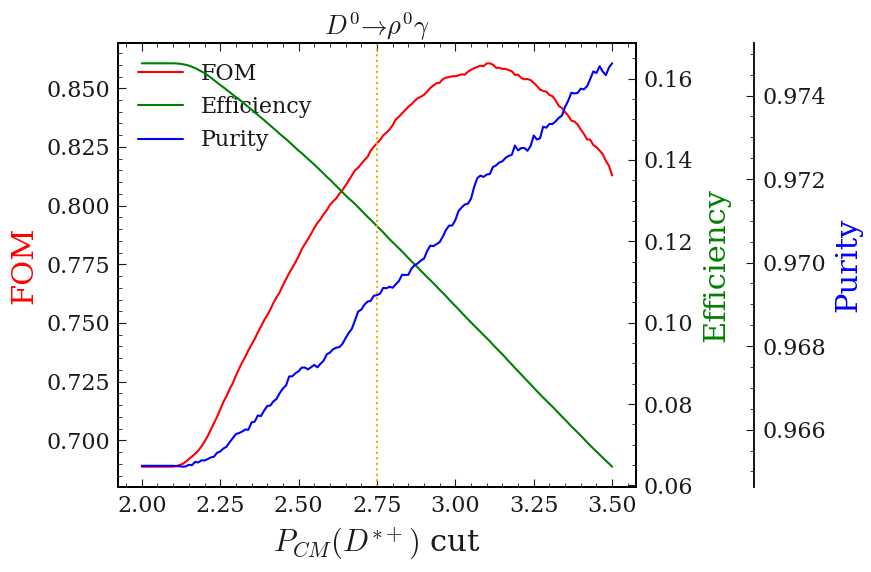

In [124]:
import matplotlib.pyplot as plt 

# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches
# (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
    
par1 = host.twinx()
par2 = host.twinx()
    
    
#host.set_xlim(2, 3.5)
# host.set_ylim(0, 2)
# par2.set_ylim(0, 4)
#par1.set_ylim(0,0.20 )


# par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
#                                         offset=(offset, 0))
# par2.axis["right"].toggle(all=True)

host.set_xlabel(r"$P_{CM}(D^{*+})$ cut")
host.set_ylabel("FOM")
par1.set_ylabel("Efficiency")
par2.set_ylabel("Purity")

# color1 = plt.cm.viridis(0)
# color2 = plt.cm.viridis(0.5)
# color3 = plt.cm.viridis(.9)
color1 = 'r'
color2 = 'g'
color3 = 'b'

p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")
p3, = par2.plot(FOM_cut_list, purity_phig_list, color=color3, label="Purity")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='upper left')

# right, left, top, bottom
offset = 85
par2.spines['right'].set_position(('outward', offset))

# no x-ticks                 
# par2.xaxis.set_ticks([])

# Sometimes handy, same for xaxis
# par2.yaxis.set_ticks_position('right')

# Move "Velocity"-axis to the left
# par2.spines['left'].set_position(('outward', 60))
# par2.spines['left'].set_visible(True)
# par2.yaxis.set_label_position('left')
# par2.yaxis.set_ticks_position('left')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

plt.title(r'$D^0 \to \rho^0 \gamma$')
plt.axvline(x=2.75,  color='orange', linestyle='dotted')

# Adjust spacings w.r.t. figsize
fig.tight_layout()
# Alternatively: bbox_inches='tight' within the plt.savefig function 
#                (overwrites figsize)


In [125]:
max_index= FOM_phig_list.index(max(FOM_phig_list))
FOM_cut_list[max_index]

3.1100000000000003

In [61]:
phig_sig_extraction_cut = 'Dstarp_CMS_p>2.75 & Belle2Pi0Veto_75MeV>0.014 & pi0_soft_cosHelicityAngleMomentum_75MeV<-0.5 '
# phig_sig_extraction_cut = 'Dstarp_CMS_p>2.75'

# phig_sig_extraction_cut = 'Dstarp_CMS_p>2.75  & Pi0_Prob<0.9'

# phig_sig_extraction_cut = 'Dstarp_CMS_p>2.7 & FBDT_rho>0.5'

# phig_sig_extraction_cut = 'Dstarp_CMS_p>2.7 & FBDT_rho>0.4'

#phig_sig_extraction_cut = ' abs(D0_cosHel_0)<0.8 & Pi0_Prob<0.8'
# phig_sig_extraction_cut = '  Pi0_Prob<0.8'

#ccbar_cut = phig_sig_extraction_cut + '& iCascDcyBrP_Dst_0 !=217'
# phig_sig_extraction_ccbar = phig_pre_extraction_ccbar.query(ccbar_cut)
phig_sig_extraction_ccbar = phig_pre_extraction_ccbar.query(phig_sig_extraction_cut)
phig_sig_extraction_uubar = phig_pre_extraction_uubar.query(phig_sig_extraction_cut)
phig_sig_extraction_ddbar = phig_pre_extraction_ddbar.query(phig_sig_extraction_cut)
phig_sig_extraction_ssbar = phig_pre_extraction_ssbar.query(phig_sig_extraction_cut)
phig_sig_extraction_charged = phig_pre_extraction_charged.query(phig_sig_extraction_cut)
phig_sig_extraction_mixed = phig_pre_extraction_mixed.query(phig_sig_extraction_cut)
phig_sig_extraction_taupair = phig_pre_extraction_taupair.query(phig_sig_extraction_cut)

# signal_cut = phig_sig_extraction_cut + '& iCascDcyBrP_Dst_0 ==217'

# phig_signal = phig_pre_extraction_ccbar.query(signal_cut)

In [62]:
# signal_filter='iCascDcyBrP_Dst_0 ==217 && rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && abs(Rho_M - 0.77526)< 0.125 && abs(Dstarp_Q-0.00593)<0.002 && Dstarp_CMS_p>2.57 && Pi0_Prob<0.85  '

# phig_signal = get_pd(file=phigamma_ccbar, tree=tree,base_filter=signal_filter,variables=ccbar_variables)


In [63]:
# plt.hist(phig_signal[var],bins=xbins, histtype='step',color='red', label='signal');
# len(phig_signal)


D0_M


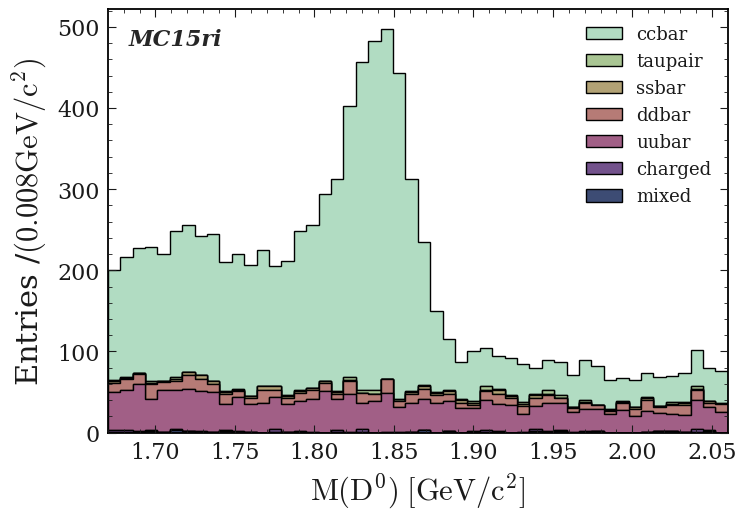

<Figure size 800x550 with 0 Axes>

In [64]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_sig_extraction_mixed[var] }
    charged_bkg = {var : phig_sig_extraction_charged[var] }
    ccbar_bkg = {var : phig_sig_extraction_ccbar[var] }
    uubar_bkg = {var : phig_sig_extraction_uubar[var] }
    ddbar_bkg = {var : phig_sig_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_sig_extraction_ssbar[var] }
    taupair_bkg = {var : phig_sig_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(phig_signal[var],bins=xbins, histtype='step',color='red', label='signal')
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    
    
    plt.savefig("rho_0.png")
    plt.show()
    plt.clf()
    

D0_M


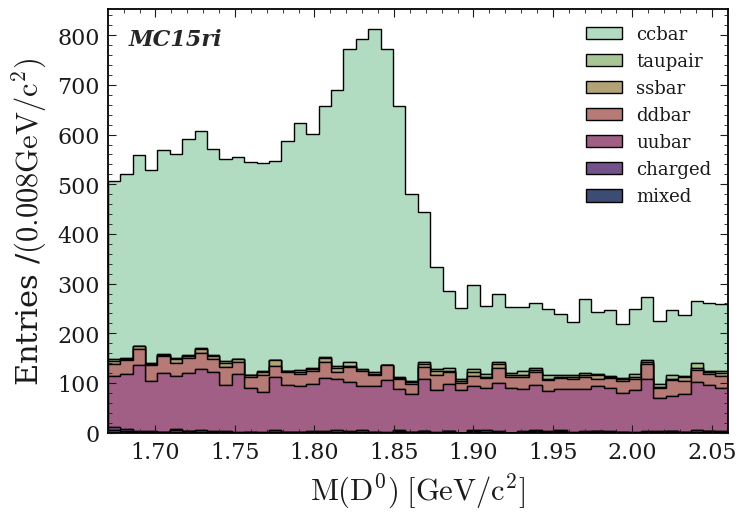

<Figure size 800x550 with 0 Axes>

In [35]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_sig_extraction_mixed[var] }
    charged_bkg = {var : phig_sig_extraction_charged[var] }
    ccbar_bkg = {var : phig_sig_extraction_ccbar[var] }
    uubar_bkg = {var : phig_sig_extraction_uubar[var] }
    ddbar_bkg = {var : phig_sig_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_sig_extraction_ssbar[var] }
    taupair_bkg = {var : phig_sig_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


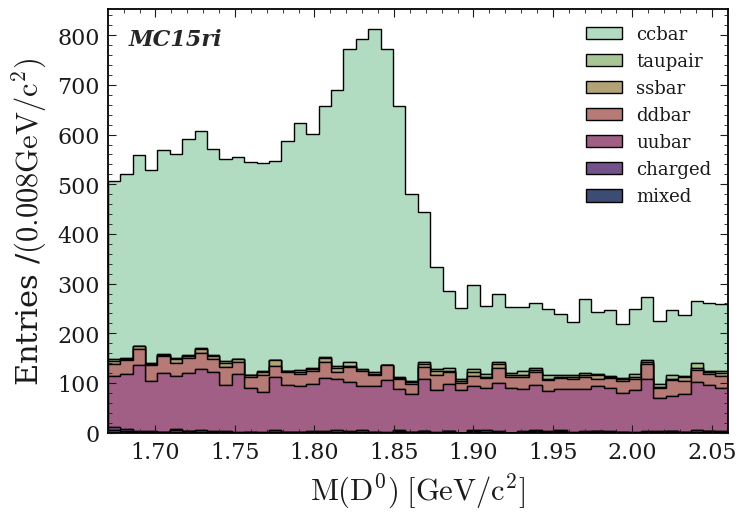

<Figure size 800x550 with 0 Axes>

In [36]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_sig_extraction_mixed[var] }
    charged_bkg = {var : phig_sig_extraction_charged[var] }
    ccbar_bkg = {var : phig_sig_extraction_ccbar[var] }
    uubar_bkg = {var : phig_sig_extraction_uubar[var] }
    ddbar_bkg = {var : phig_sig_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_sig_extraction_ssbar[var] }
    taupair_bkg = {var : phig_sig_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

Pi0_Prob


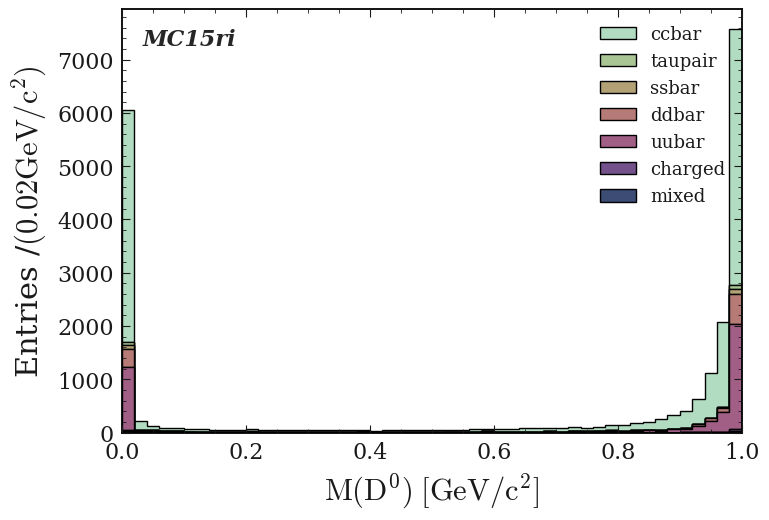

<Figure size 800x550 with 0 Axes>

In [138]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["Pi0_Prob"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_sig_extraction_mixed[var] }
    charged_bkg = {var : phig_sig_extraction_charged[var] }
    ccbar_bkg = {var : phig_sig_extraction_ccbar[var] }
    uubar_bkg = {var : phig_sig_extraction_uubar[var] }
    ddbar_bkg = {var : phig_sig_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_sig_extraction_ssbar[var] }
    taupair_bkg = {var : phig_sig_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

In [37]:
pd_merged = pd.concat([phig_sig_extraction_mixed, phig_sig_extraction_charged, phig_sig_extraction_ccbar, \
                     phig_sig_extraction_uubar, phig_sig_extraction_ddbar, phig_sig_extraction_ssbar, phig_sig_extraction_taupair])

In [47]:
#sigMC_file_loc = '/media/jykim/T7/storage/01_recon/rho/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_rho.root'
half_1_sigMC = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_rho_*.root'

base_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06  && abs(Rho_M - 0.77526)< 0.125 && abs(Dstarp_Q-0.00593)<0.0010'
base_filter=' D0_M>1.67 && D0_M<2.06 && abs(Rho_M - 0.77526)< 0.125 && abs(Dstarp_Q-0.00593)<0.0006 && Dstarp_CMS_p>2.75'

base_filter=' D0_M>1.67 && D0_M<2.06 '

#base_filter='rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06  && abs(Rho_M - 0.77526)< 0.125 && abs(Dstarp_Q-0.00593)<0.002 '

#variables=['D0_M','D0_cosHel_0','Rho_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','Pi0_Prob']
tree='rho'

pd_phigamma_isSignal_all_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)

In [43]:

signal_variables = ["Pi0_Prob"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(pd_merged[var], bins=xbins, histtype='stepfilled',label='background',density=True, hatch="//")
    plt.hist(pd_phigamma_isSignal_all_sigMC[var], bins=xbins, histtype='step',label='signal',density=True, hatch="//")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to \rho^0 \gamma$' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\pi^0$ probability")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.show()
    plt.clf()

KeyError: 'Pi0_Prob'

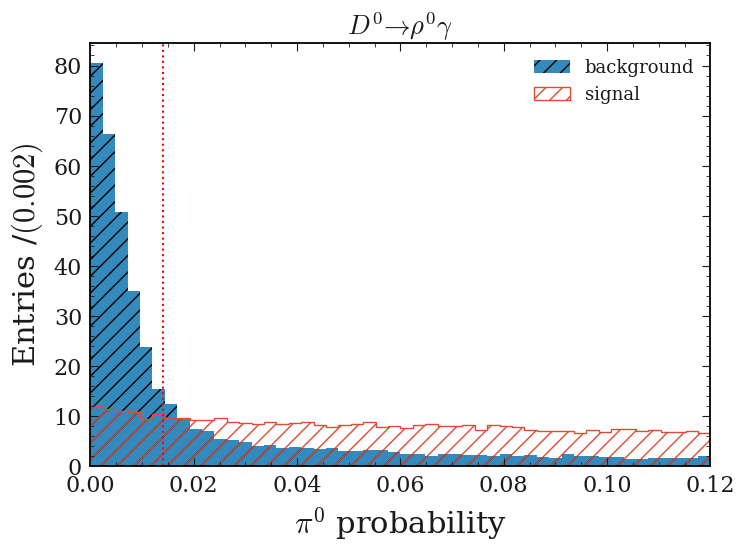

<Figure size 800x550 with 0 Axes>

In [52]:

signal_variables = ["Belle2Pi0Veto_75MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']

#     for labeling in labels:
    xrange=(0,0.12)
    xbins = np.linspace(*xrange,51)
    plt.hist(pd_merged[var], bins=xbins, histtype='stepfilled',label='background',density=True, hatch="//")
    plt.hist(pd_phigamma_isSignal_all_sigMC[var], bins=xbins, histtype='step',label='signal',density=True, hatch="//")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
    plt.axvline(x=0.014,  color='red', linestyle='dotted')

#     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to \rho^0 \gamma$' )

    n, xe = np.histogram(pd_merged[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\pi^0$ probability")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.show()
    plt.clf()

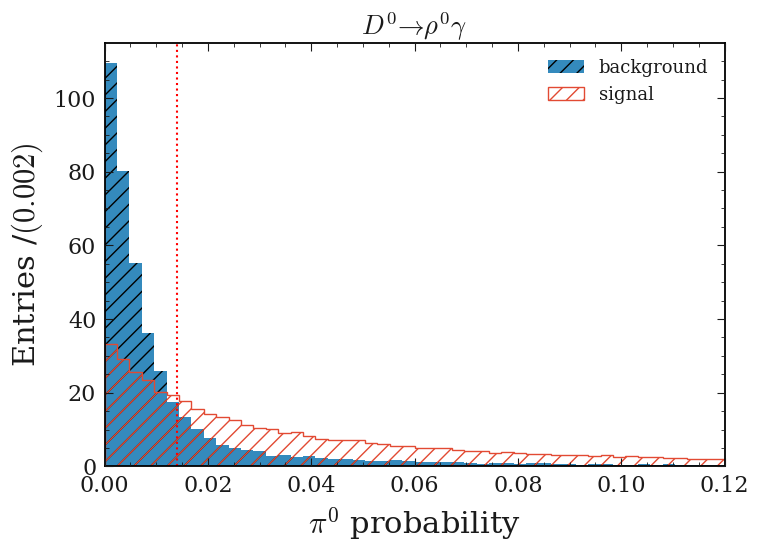

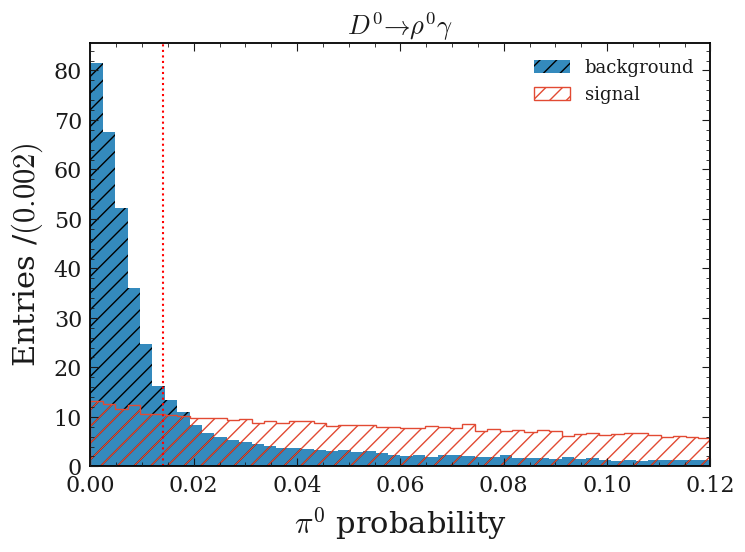

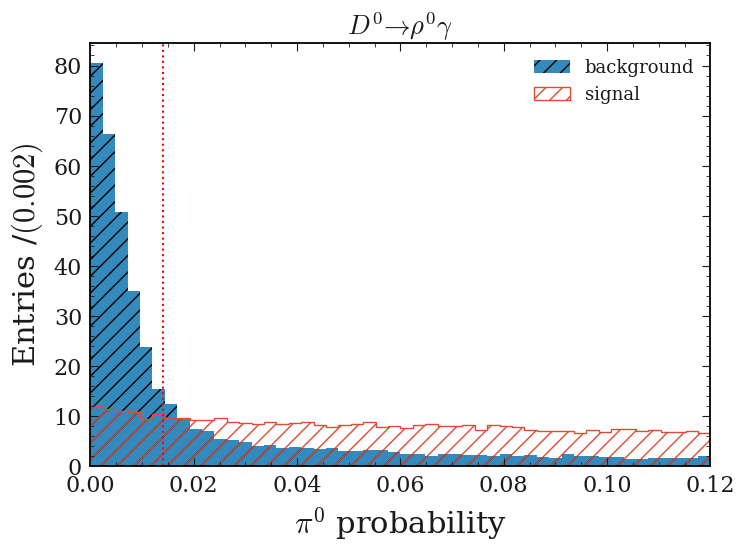

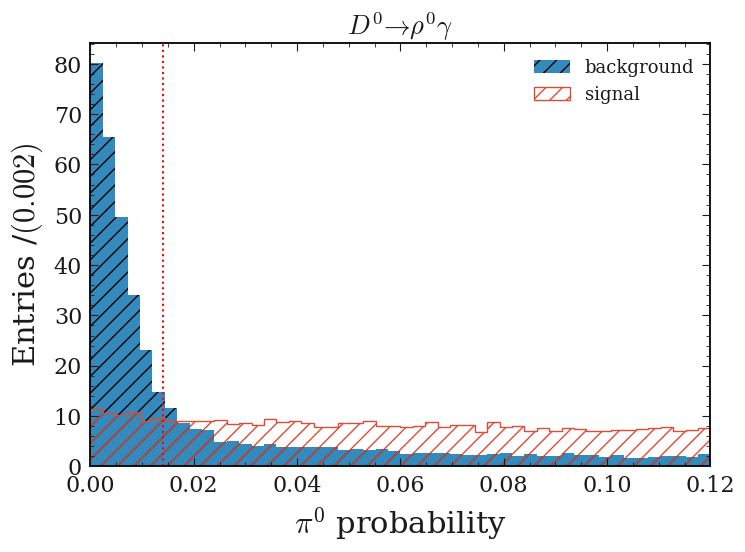

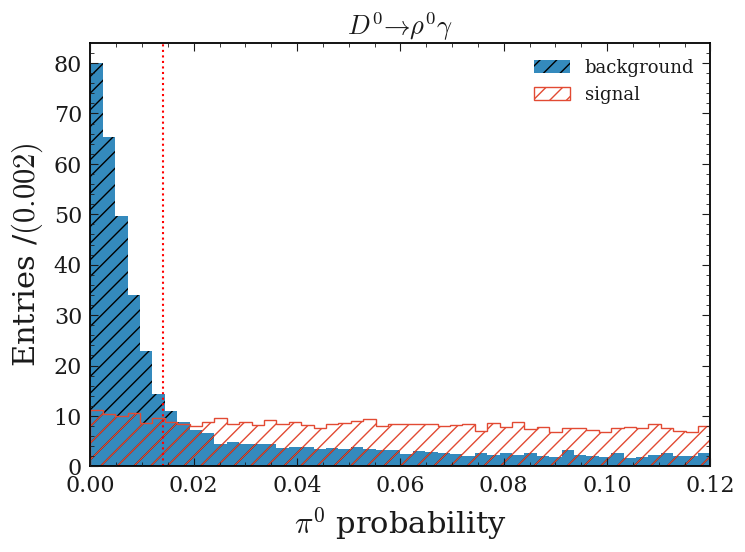

<Figure size 800x550 with 0 Axes>

In [53]:

signal_variables = ["Belle2Pi0Veto","Belle2Pi0Veto_50MeV","Belle2Pi0Veto_75MeV","Belle2Pi0Veto_100MeV","Belle2Pi0Veto_125MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']

#     for labeling in labels:
    xrange=(0,0.12)
    xbins = np.linspace(*xrange,51)
    plt.hist(pd_merged[var], bins=xbins, histtype='stepfilled',label='background',density=True, hatch="//")
    plt.hist(pd_phigamma_isSignal_all_sigMC[var], bins=xbins, histtype='step',label='signal',density=True, hatch="//")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
    plt.axvline(x=0.014,  color='red', linestyle='dotted')

#     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to \rho^0 \gamma$' )

    n, xe = np.histogram(pd_merged[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\pi^0$ probability")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.show()
    plt.clf()

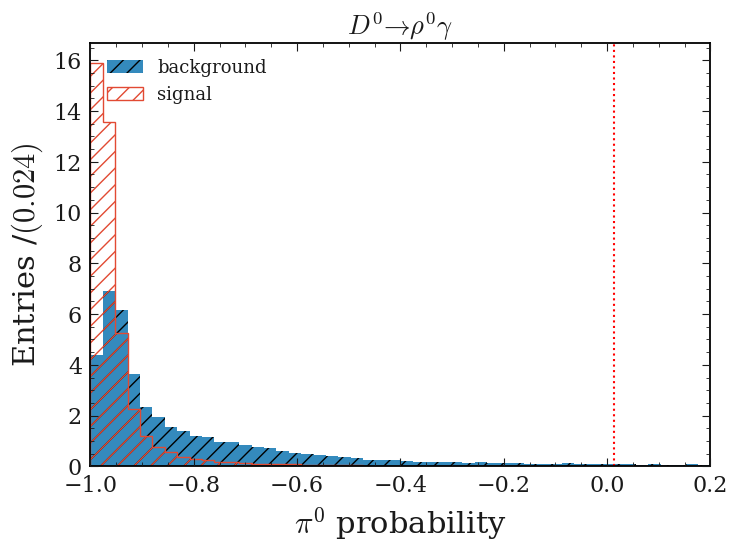

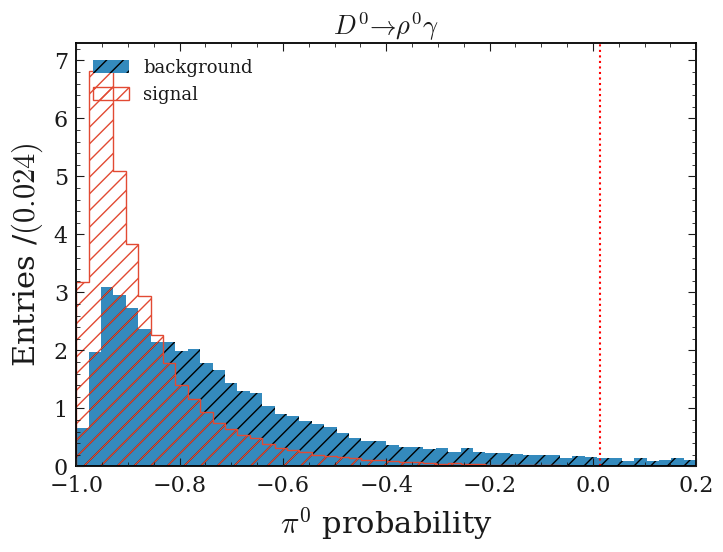

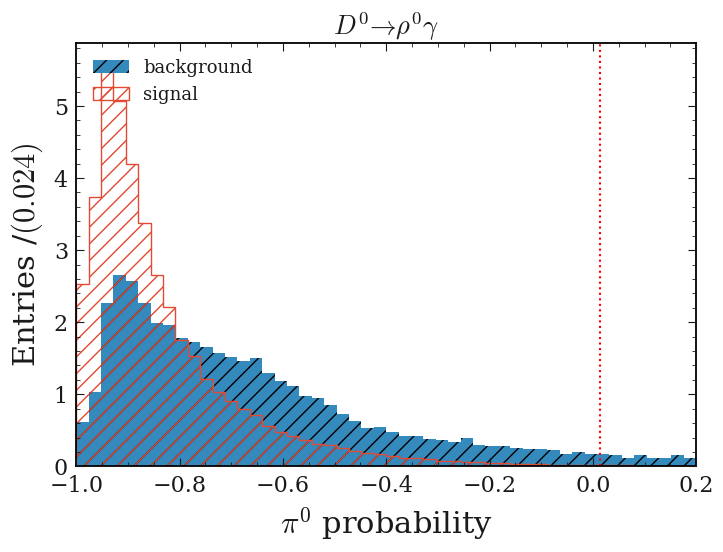

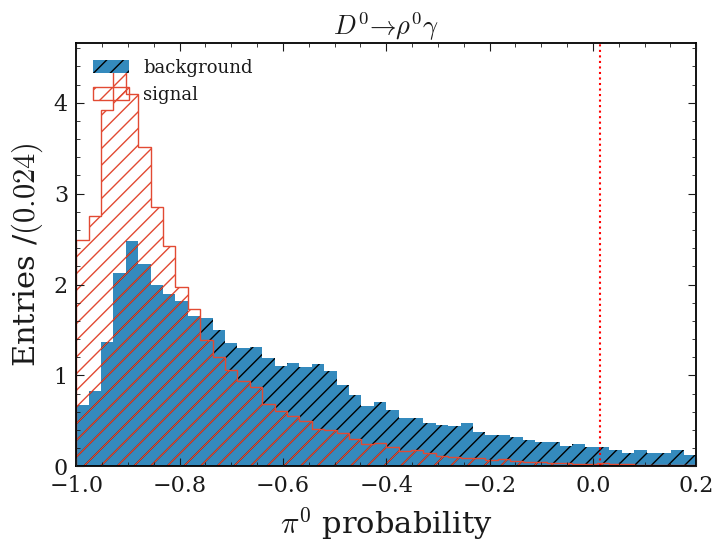

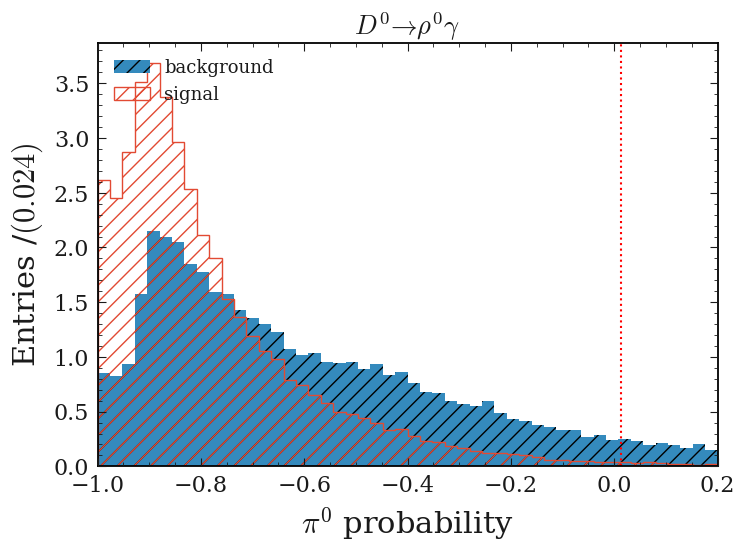

<Figure size 800x550 with 0 Axes>

In [55]:

signal_variables = ['pi0_soft_cosHelicityAngleMomentum',"pi0_soft_cosHelicityAngleMomentum_50MeV","pi0_soft_cosHelicityAngleMomentum_75MeV","pi0_soft_cosHelicityAngleMomentum_100MeV","pi0_soft_cosHelicityAngleMomentum_125MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']

#     for labeling in labels:
    xrange=(-1,0.2)
    xbins = np.linspace(*xrange,51)
    plt.hist(pd_merged[var], bins=xbins, histtype='stepfilled',label='background',density=True, hatch="//")
    plt.hist(pd_phigamma_isSignal_all_sigMC[var], bins=xbins, histtype='step',label='signal',density=True, hatch="//")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
    plt.axvline(x=0.014,  color='red', linestyle='dotted')

#     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to \rho^0 \gamma$' )

    n, xe = np.histogram(pd_merged[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\pi^0$ probability")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.show()
    plt.clf()

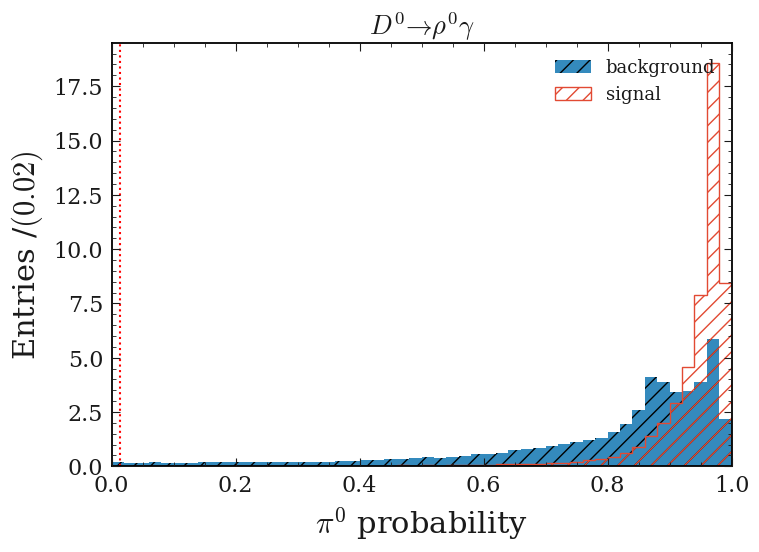

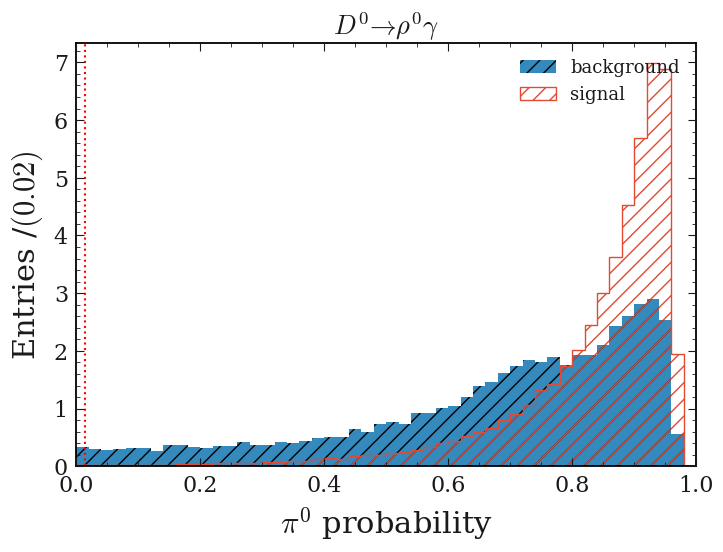

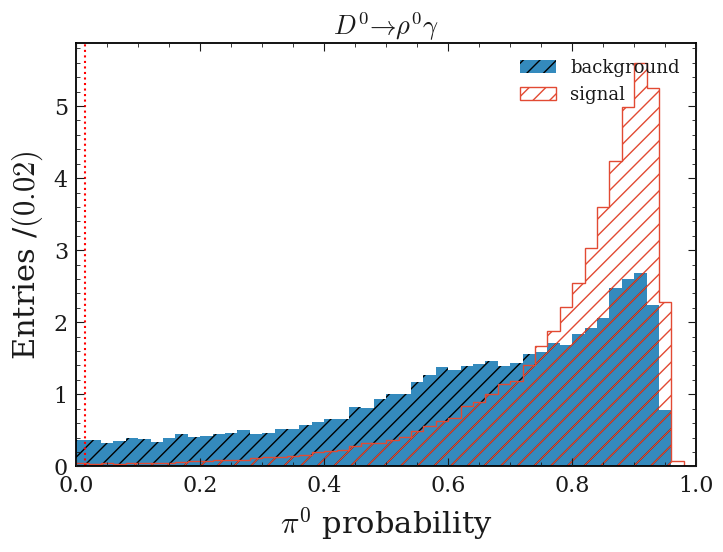

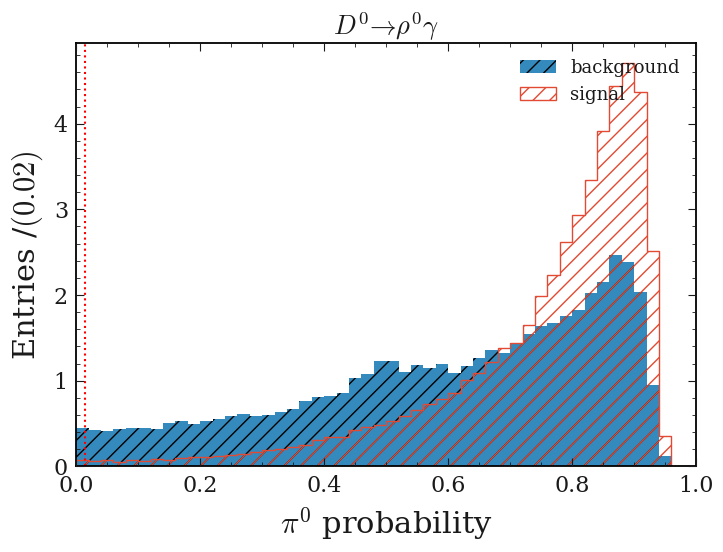

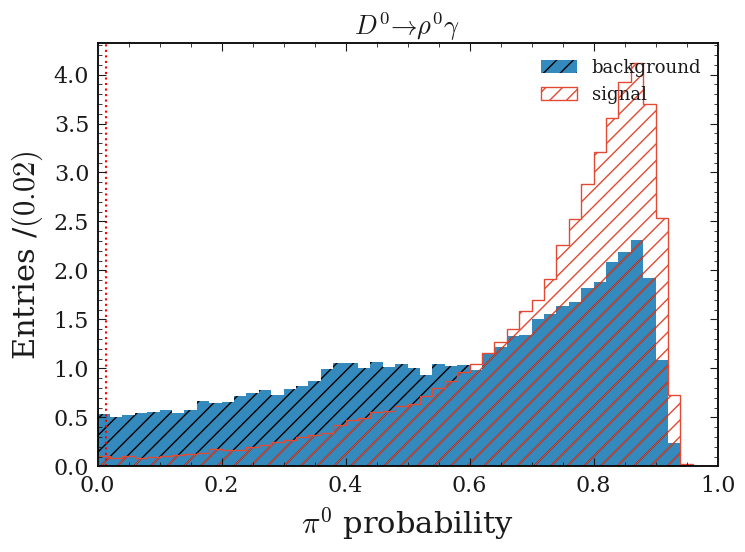

<Figure size 800x550 with 0 Axes>

In [56]:

signal_variables = ['pi0veto_Easym',"pi0veto_Easym_50MeV","pi0veto_Easym_75MeV","pi0veto_Easym_100MeV","pi0veto_Easym_125MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(pd_merged[var], bins=xbins, histtype='stepfilled',label='background',density=True, hatch="//")
    plt.hist(pd_phigamma_isSignal_all_sigMC[var], bins=xbins, histtype='step',label='signal',density=True, hatch="//")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
    plt.axvline(x=0.014,  color='red', linestyle='dotted')

#     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to \rho^0 \gamma$' )

    n, xe = np.histogram(pd_merged[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\pi^0$ probability")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.show()
    plt.clf()

Eta_Prob


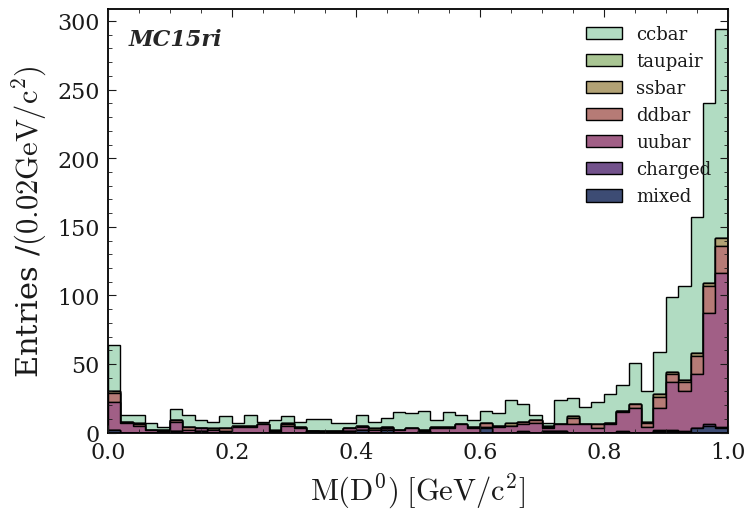

<Figure size 800x550 with 0 Axes>

In [70]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["Eta_Prob"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_sig_extraction_mixed[var] }
    charged_bkg = {var : phig_sig_extraction_charged[var] }
    ccbar_bkg = {var : phig_sig_extraction_ccbar[var] }
    uubar_bkg = {var : phig_sig_extraction_uubar[var] }
    ddbar_bkg = {var : phig_sig_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_sig_extraction_ssbar[var] }
    taupair_bkg = {var : phig_sig_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

FBDT_rho


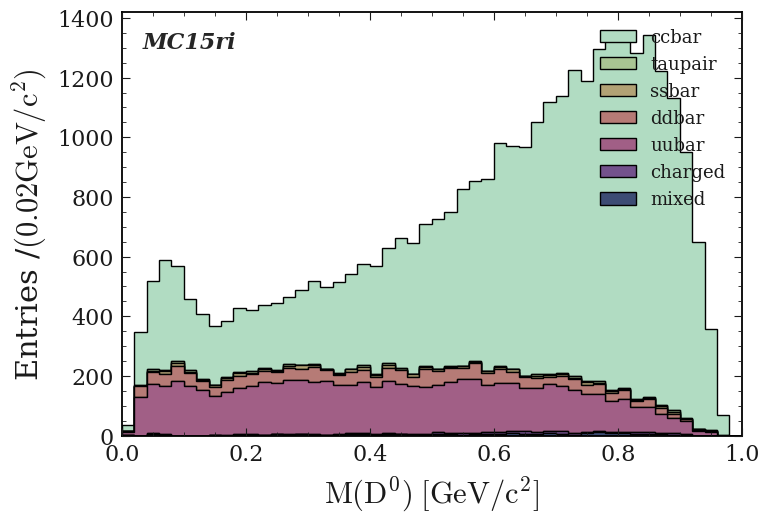

<Figure size 800x550 with 0 Axes>

In [42]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["FBDT_rho"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_sig_extraction_mixed[var] }
    charged_bkg = {var : phig_sig_extraction_charged[var] }
    ccbar_bkg = {var : phig_sig_extraction_ccbar[var] }
    uubar_bkg = {var : phig_sig_extraction_uubar[var] }
    ddbar_bkg = {var : phig_sig_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_sig_extraction_ssbar[var] }
    taupair_bkg = {var : phig_sig_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

gamma_p


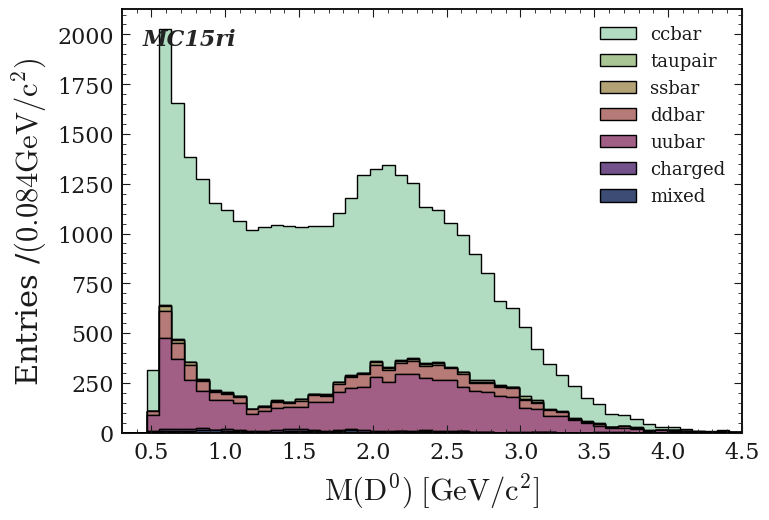

<Figure size 800x550 with 0 Axes>

In [43]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["gamma_p"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_sig_extraction_mixed[var] }
    charged_bkg = {var : phig_sig_extraction_charged[var] }
    ccbar_bkg = {var : phig_sig_extraction_ccbar[var] }
    uubar_bkg = {var : phig_sig_extraction_uubar[var] }
    ddbar_bkg = {var : phig_sig_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_sig_extraction_ssbar[var] }
    taupair_bkg = {var : phig_sig_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0.3,4.5)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

In [18]:
xrange = (0,1,41)
xm = np.linspace(*xrange)
#pd_df = pd_antiKstar.query("gamma_genMotherPDG == 111 and Pis_charge ==1")

var = 'Pi0_Prob'
bkg_all_pi0_prob = pd.DataFrame()
bkg_all_pi0_prob[var] = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
)

plt.hist(bkg_all_pi0_prob['Pi0_Prob'], label=r'generic bkg',bins=xm,  histtype='stepfilled',hatch='//',density=True) 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\pi^0$ Probability'
# plot_title = '0.5M Signal MC'

file = '/media/jykim/T7/storage/01_recon/phi/trainv2new_pre_extraction_signalMC_recon_mdst_phi.root'
tree = 'phi'
# base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'

base_filter = 'Pis_charge == 1 && Dstarp_isSignal==1'
variables=['Pi0_Prob']


pd_df = get_pd(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Pi0_Prob'], label=r'signal$(D^0 \to \phi \gamma)$',bins=xm,  histtype='step',hatch="//",density=True) 

plt.axvline(x=0.9, ymin=0, ymax=0.80, color='r', ls='--', lw=2)
ax.set_xlabel(xlabel)
# plt.title(plot_title)
plt.legend(loc="upper left")

KeyError: 'Pi0_Prob'

In [19]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["Dstarp_visibleEnergyOfEventCMS","Dstarp_missingMass2OfEvent","Dstarp_missingEnergyOfEventCMS","Dstarp_missingMomentumOfEventCMS","Dstarp_missingMomentumOfEvent"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_sig_extraction_mixed[var] }
    charged_bkg = {var : phig_sig_extraction_charged[var] }
    ccbar_bkg = {var : phig_sig_extraction_ccbar[var] }
    uubar_bkg = {var : phig_sig_extraction_uubar[var] }
    ddbar_bkg = {var : phig_sig_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_sig_extraction_ssbar[var] }
    taupair_bkg = {var : phig_sig_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,20)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

Dstarp_visibleEnergyOfEventCMS


KeyError: 'Dstarp_visibleEnergyOfEventCMS'